In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as soup
import json
import time

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [38]:
path = '/Users/ivylai/Desktop/Galvanize/clean_apt_data.csv'
data = pd.read_csv(path)

In [108]:
path = '/Users/ivylai/Desktop/Galvanize/clean_apt_data_norange.csv'
data_norange = pd.read_csv(path)

In [109]:
# data_norange.drop(columns = ['Unnamed: 0','rent_range','sq_ft_range'], inplace = True)
data_norange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7122 entries, 0 to 7121
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               7122 non-null   object 
 1   property_name     7122 non-null   object 
 2   city              7122 non-null   object 
 3   rent_updated      7122 non-null   float64
 4   n_bed             7122 non-null   int64  
 5   n_bath            7122 non-null   float64
 6   sq_ft_updated     7122 non-null   float64
 7   walkscore         7122 non-null   float64
 8   allow_pet         7122 non-null   int64  
 9   minimum_lease     7122 non-null   int64  
 10  onsite_parking    7122 non-null   int64  
 11  pool              7122 non-null   int64  
 12  fitness_center    7122 non-null   int64  
 13  elevator          7122 non-null   int64  
 14  kitchen_features  7122 non-null   int64  
 15  security_system   7122 non-null   int64  
 16  washer_dryer      7122 non-null   int64  


In [111]:
data_norange.rent_updated.describe()

count     7122.000000
mean      3083.947065
std       2118.194388
min        500.000000
25%       2030.750000
50%       2725.000000
75%       3550.000000
max      65000.000000
Name: rent_updated, dtype: float64

In [112]:
print(np.percentile(data_norange.rent_updated, 85))
print(np.percentile(data_norange.rent_updated, 5))

4176.0
1370.0


In [39]:
# data.drop(columns = ['Unnamed: 0'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15588 entries, 0 to 15587
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               15588 non-null  object 
 1   property_name     15588 non-null  object 
 2   city              15588 non-null  object 
 3   rent_updated      15588 non-null  float64
 4   n_bed             15588 non-null  int64  
 5   n_bath            15588 non-null  float64
 6   sq_ft_updated     15588 non-null  float64
 7   walkscore         15588 non-null  float64
 8   allow_pet         15588 non-null  int64  
 9   minimum_lease     15588 non-null  int64  
 10  onsite_parking    15588 non-null  int64  
 11  pool              15588 non-null  int64  
 12  fitness_center    15588 non-null  int64  
 13  elevator          15588 non-null  int64  
 14  kitchen_features  15588 non-null  int64  
 15  security_system   15588 non-null  int64  
 16  washer_dryer      15588 non-null  int64 

In [94]:
data.rent_updated.describe()

count    15588.000000
mean      3110.892257
std       1850.622968
min        500.000000
25%       2183.375000
50%       2799.000000
75%       3609.625000
max      65000.000000
Name: rent_updated, dtype: float64

In [98]:
print(np.percentile(data.rent_updated, 85))
print(np.percentile(data.rent_updated, 5))

4170.0
1495.0


In [335]:
data_0to3 = data[data.n_bed < 4]

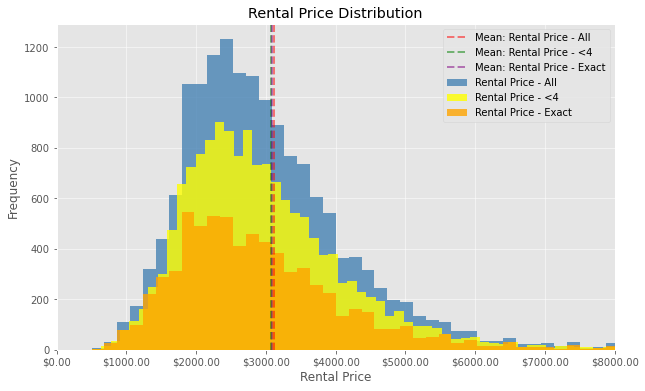

In [336]:
fig, ax = plt.subplots(figsize = (10,6))
ax.hist(data['rent_updated'], bins = 350, color = 'steelblue',alpha = 0.8, label = 'Rental Price - All')
ax.axvline(x = np.mean(data['rent_updated']), c ='red', alpha = 0.5, linestyle = '--', label = 'Mean: Rental Price - All')
ax.hist(data_0to3['rent_updated'], bins = 350, color = 'yellow',alpha = 0.8, label = 'Rental Price - <4')
ax.axvline(x = np.mean(data_0to3['rent_updated']), c ='green', alpha = 0.5, linestyle = '--', label = 'Mean: Rental Price - <4')
ax.hist(data_norange['rent_updated'], bins = 350, color = 'orange',  alpha = 0.8, label = 'Rental Price - Exact')
ax.axvline(x = np.mean(data_norange['rent_updated']), c ='purple', alpha = 0.5, linestyle = '--', label = 'Mean: Rental Price - Exact')
ax.set_xlim(left = 0, right = 8000)
ax.xaxis.set_major_formatter('${x:1.2f}')
ax.set_xlabel('Rental Price')
ax.set_ylabel('Frequency')
ax.set_title('Rental Price Distribution')
ax.legend()

Text(0.5, 1.0, 'Top 5 Cities with the Most Listings')

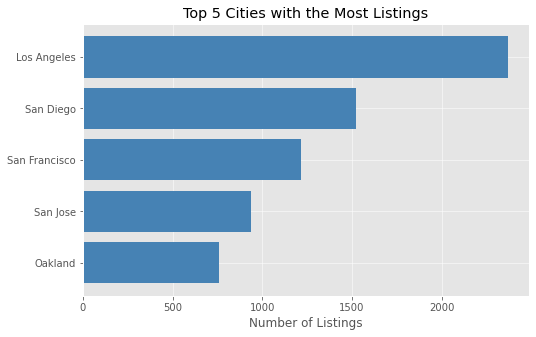

In [89]:
city_lst = []
cities, count = np.unique(data['city'].to_numpy(), return_counts = True)
for city, n in zip(cities, count):
    city_lst.append((city, n))
    
sorted_city = sorted(city_lst,key=lambda x: x[1], reverse=True)
top5_cities = [x[0] for x in sorted_city[:5]][::-1]
top5_n = [x[1] for x in sorted_city[:5]][::-1]

fig, ax = plt.subplots(figsize = (8,5))
ax.barh(top5_cities, top5_n, color = 'steelblue')
ax.set_xlabel('Number of Listings')

ax.set_title('Top 5 Cities with the Most Listings')

Text(0.5, 1.0, 'Top 5 Cities with the Most Listings')

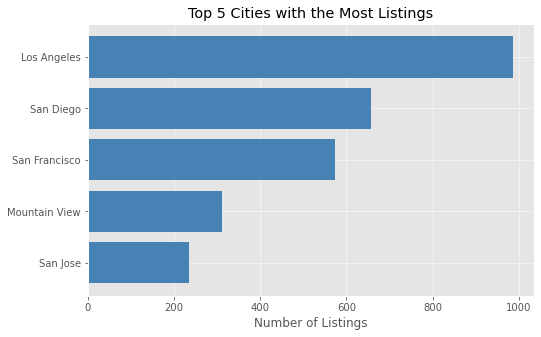

In [117]:
city_lst = []
cities, count = np.unique(data_norange['city'].to_numpy(), return_counts = True)
for city, n in zip(cities, count):
    city_lst.append((city, n))
    
sorted_city = sorted(city_lst,key=lambda x: x[1], reverse=True)
top5_cities = [x[0] for x in sorted_city[:5]][::-1]
top5_n = [x[1] for x in sorted_city[:5]][::-1]

fig, ax = plt.subplots(figsize = (8,5))
ax.barh(top5_cities, top5_n, color = 'steelblue')
ax.set_xlabel('Number of Listings')

ax.set_title('Top 5 Cities with the Most Listings')

In [24]:
# Manually get the top 5 average

header = {"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}
city_page_url = 'https://www.apartments.com/oakland-ca/'

r = requests.get(city_page_url, timeout = 30, headers = header)
if r.status_code == 200:
    page_soup = soup(r.content, 'html.parser')
    script = page_soup.find('script',type='application/ld+json')
        
    script_json = json.loads(str(script)[41:-11])

# script_json

In [26]:
sf_avg_rent = {'Studio': '$2,660', '1 Bedroom': '$2,626', '2 Bedroom': '$3,743', '3 Bedroom': '$3,948'}
la_avg_rent = {'Studio': '$1,183', '1 Bedroom': '$1,891', '2 Bedroom': '$2,427', '3 Bedroom': '$3,988'}
sd_avg_rent = {'Studio': '$1,585', '1 Bedroom': '$1,340', '2 Bedroom': '$1,707', '3 Bedroom': '$3,112'}
sj_avg_rent = {'Studio': '$1,889', '1 Bedroom': '$2,156', '2 Bedroom': '$2,885', '3 Bedroom': '$4,032'}
okl_avg_rent = {'Studio': '$1,408', '1 Bedroom': '$1,559', '2 Bedroom': '$1,835', '3 Bedroom': '$2,479'}
total_avg_rent = {'Studio': '$2,209', '1 Bedroom': '$2,662', '2 Bedroom': '$3,399', '3 Bedroom': '$4,284'}

sf = pd.DataFrame([sf_avg_rent], index = ['San Francisco'])
la = pd.DataFrame([la_avg_rent], index = ['Los Angeles'])
sd = pd.DataFrame([sd_avg_rent], index = ['San Diego'])
sj = pd.DataFrame([sj_avg_rent], index = ['San Jose'])
oak = pd.DataFrame([okl_avg_rent], index = ['Oakland'])
avg = pd.DataFrame([total_avg_rent], index = ['Overall Average'])

top5_avg = pd.concat([la,sd,sf,sj,oak, avg])
top5_avg_numeric = top5_avg.replace('[\$\,\.]',"",regex=True).astype(int)
top5_avg_numeric

,Studio,1 Bedroom,2 Bedroom,3 Bedroom
Los Angeles,1183,1891,2427,3988
San Diego,1585,1340,1707,3112
San Francisco,2660,2626,3743,3948
San Jose,1889,2156,2885,4032
Oakland,1408,1559,1835,2479
Overall Average,2209,2662,3399,4284


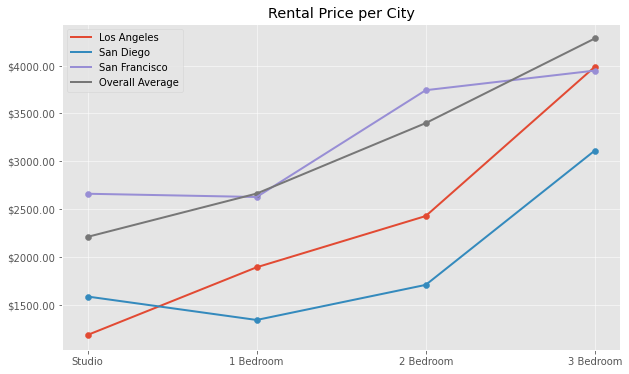

In [120]:
fig, ax = plt.subplots(figsize = (10,6))
x = [1,2,3,4]
ax.plot(x, top5_avg_numeric.loc['Los Angeles'], label = 'Los Angeles')
ax.scatter(x, top5_avg_numeric.loc['Los Angeles'])
ax.plot(x, top5_avg_numeric.loc['San Diego'], label = 'San Diego')
ax.scatter(x, top5_avg_numeric.loc['San Diego'])
ax.plot(x, top5_avg_numeric.loc['San Francisco'], label = 'San Francisco')
ax.scatter(x, top5_avg_numeric.loc['San Francisco'])
# ax.plot(x, top5_avg_numeric.loc['San Jose'], label = 'San Jose')
# ax.scatter(x, top5_avg_numeric.loc['San Jose'])
# ax.plot(x, top5_avg_numeric.loc['Oakland'], label = 'Oakland')
# ax.scatter(x, top5_avg_numeric.loc['Oakland'])
ax.plot(x, top5_avg_numeric.loc['Overall Average'], label = 'Overall Average')
ax.scatter(x, top5_avg_numeric.loc['Overall Average'])
ax.set_xticks(np.arange(1,5))
ax.set_xticklabels(top5_avg_numeric.columns)
ax.yaxis.set_major_formatter('${x:1.2f}')
ax.set_title("Rental Price per City")

ax.legend()

In [35]:
city_dummies = pd.get_dummies(data['city'])
top5_city_dunnies = city_dummies[['Los Angeles', 'San Diego', 'San Francisco', 'San Jose', 'Oakland']]

In [40]:
data1 = pd.concat([data, top5_city_dunnies], axis=1)
data1[data1['city'] == 'San Francisco']

,url,property_name,city,rent_updated,n_bed,n_bath,sq_ft_updated,walkscore,allow_pet,minimum_lease,...,security_system,washer_dryer,internet,air_conditioning,furnished,Los Angeles,San Diego,San Francisco,San Jose,Oakland
108,https://www.apartments.com/mark-hopkins-san-fr...,MARK HOPKINS,San Francisco,2250.0,0,1.0,300.0,98.0,0,1,...,1,0,1,0,0,0,0,1,0,0
109,https://www.apartments.com/mark-hopkins-san-fr...,MARK HOPKINS,San Francisco,2800.0,1,1.0,465.0,98.0,0,1,...,1,0,1,0,0,0,0,1,0,0
128,https://www.apartments.com/1995-chestnut-stree...,1995 Chestnut Street Apartments,San Francisco,3000.0,1,1.0,650.0,98.0,0,12,...,1,0,0,1,0,0,0,1,0,0
129,https://www.apartments.com/1995-chestnut-stree...,1995 Chestnut Street Apartments,San Francisco,3500.0,2,1.0,950.0,98.0,0,12,...,1,0,0,1,0,0,0,1,0,0
360,https://www.apartments.com/24-franklin-san-fra...,24 Franklin,San Francisco,2665.0,0,1.0,580.0,99.0,0,12,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15318,https://www.apartments.com/avalon-hayes-valley...,Avalon Hayes Valley,San Francisco,3375.0,1,1.0,768.0,99.0,1,8,...,0,1,1,1,0,0,0,1,0,0
15319,https://www.apartments.com/avalon-hayes-valley...,Avalon Hayes Valley,San Francisco,3900.0,1,1.0,609.0,99.0,1,8,...,0,1,1,1,0,0,0,1,0,0
15320,https://www.apartments.com/avalon-hayes-valley...,Avalon Hayes Valley,San Francisco,4290.0,2,2.0,1010.0,99.0,1,8,...,0,1,1,1,0,0,0,1,0,0
15321,https://www.apartments.com/avalon-hayes-valley...,Avalon Hayes Valley,San Francisco,4385.0,2,2.0,1127.0,99.0,1,8,...,0,1,1,1,0,0,0,1,0,0


In [42]:
data1.columns

Index(['url', 'property_name', 'city', 'rent_updated', 'n_bed', 'n_bath',
       'sq_ft_updated', 'walkscore', 'allow_pet', 'minimum_lease',
       'onsite_parking', 'pool', 'fitness_center', 'elevator',
       'kitchen_features', 'security_system', 'washer_dryer', 'internet',
       'air_conditioning', 'furnished', 'Los Angeles', 'San Diego',
       'San Francisco', 'San Jose', 'Oakland'],
      dtype='object')

In [49]:
data2 = data1[['rent_updated', 'n_bed', 'n_bath','sq_ft_updated', 'Los Angeles', 'San Diego',
       'San Francisco', 'San Jose', 'Oakland', 'walkscore', 'minimum_lease', 'kitchen_features', 
        'washer_dryer', 'internet','air_conditioning', 
       'onsite_parking','elevator', 'pool', 'fitness_center', 'allow_pet',
       'security_system', 'furnished']]

In [50]:
data2.columns

Index(['rent_updated', 'n_bed', 'n_bath', 'sq_ft_updated', 'Los Angeles',
       'San Diego', 'San Francisco', 'San Jose', 'Oakland', 'walkscore',
       'minimum_lease', 'kitchen_features', 'washer_dryer', 'internet',
       'air_conditioning', 'onsite_parking', 'elevator', 'pool',
       'fitness_center', 'allow_pet', 'security_system', 'furnished'],
      dtype='object')

[Text(0.5, 0, 'Rental Price'),
 Text(1.5, 0, 'Number of Beds'),
 Text(2.5, 0, 'Number of Baths'),
 Text(3.5, 0, 'SQ-FT'),
 Text(4.5, 0, 'Los Angeles'),
 Text(5.5, 0, 'San Diego'),
 Text(6.5, 0, 'San Francisco'),
 Text(7.5, 0, 'San Jose'),
 Text(8.5, 0, 'Oakland'),
 Text(9.5, 0, 'walkscore'),
 Text(10.5, 0, 'Minimum Lease Length'),
 Text(11.5, 0, 'Number of Kitchen Features'),
 Text(12.5, 0, 'Washer/Dryer'),
 Text(13.5, 0, 'WiFi'),
 Text(14.5, 0, 'Air Conditioning'),
 Text(15.5, 0, 'Onsite Parking'),
 Text(16.5, 0, 'Elevator'),
 Text(17.5, 0, 'Pool'),
 Text(18.5, 0, 'Fitness Center'),
 Text(19.5, 0, 'Allow Pets'),
 Text(20.5, 0, 'Security System'),
 Text(21.5, 0, 'Furnished')]

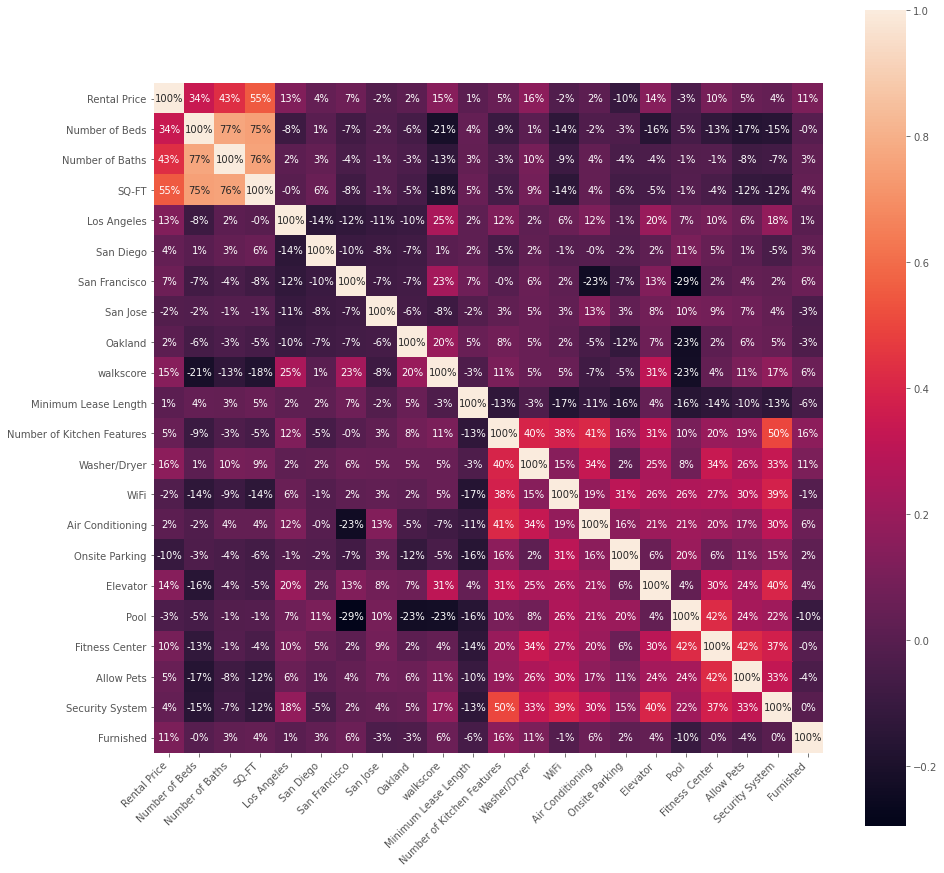

In [101]:
data2.rename(columns = {'rent_updated':'Rental Price','n_bed':'Number of Beds','n_bath':'Number of Baths',
                        'sq_ft_updated':'SQ-FT','allow_pet':'Allow Pets','minimum_lease':'Minimum Lease Length',
                        'onsite_parking':'Onsite Parking','pool':'Pool','fitness_center':'Fitness Center', 
                        'elevator':'Elevator', 'kitchen_features': 'Number of Kitchen Features', 
                        'security_system':'Security System','washer_dryer':'Washer/Dryer', 'internet':'WiFi', 
                        'air_conditioning':'Air Conditioning', 'furnished':'Furnished'},inplace=True)

fig, ax = plt.subplots(figsize=(15,15))
chart = sns.heatmap(data2.corr(),annot=True,ax=ax, square=True, fmt='0.0%')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [102]:
data2.columns

Index(['Rental Price', 'Number of Beds', 'Number of Baths', 'SQ-FT',
       'Los Angeles', 'San Diego', 'San Francisco', 'San Jose', 'Oakland',
       'walkscore', 'Minimum Lease Length', 'Number of Kitchen Features',
       'Washer/Dryer', 'WiFi', 'Air Conditioning', 'Onsite Parking',
       'Elevator', 'Pool', 'Fitness Center', 'Allow Pets', 'Security System',
       'Furnished'],
      dtype='object')

[Text(0.5, 0, 'Rental Price'),
 Text(1.5, 0, 'Number of Beds'),
 Text(2.5, 0, 'Number of Baths'),
 Text(3.5, 0, 'SQ-FT')]

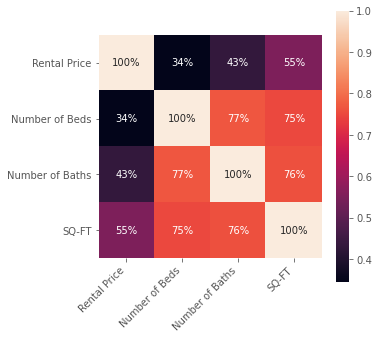

In [323]:
data3 = data2[['Rental Price', 'Number of Beds', 'Number of Baths', 'SQ-FT']]
              
fig, ax = plt.subplots(figsize=(5,5))
chart = sns.heatmap(data3.corr(),annot=True,ax=ax, square=True, fmt='0.0%')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

array([[<AxesSubplot:xlabel='Rental Price', ylabel='Rental Price'>,
        <AxesSubplot:xlabel='Number of Beds', ylabel='Rental Price'>,
        <AxesSubplot:xlabel='Number of Baths', ylabel='Rental Price'>,
        <AxesSubplot:xlabel='SQ-FT', ylabel='Rental Price'>],
       [<AxesSubplot:xlabel='Rental Price', ylabel='Number of Beds'>,
        <AxesSubplot:xlabel='Number of Beds', ylabel='Number of Beds'>,
        <AxesSubplot:xlabel='Number of Baths', ylabel='Number of Beds'>,
        <AxesSubplot:xlabel='SQ-FT', ylabel='Number of Beds'>],
       [<AxesSubplot:xlabel='Rental Price', ylabel='Number of Baths'>,
        <AxesSubplot:xlabel='Number of Beds', ylabel='Number of Baths'>,
        <AxesSubplot:xlabel='Number of Baths', ylabel='Number of Baths'>,
        <AxesSubplot:xlabel='SQ-FT', ylabel='Number of Baths'>],
       [<AxesSubplot:xlabel='Rental Price', ylabel='SQ-FT'>,
        <AxesSubplot:xlabel='Number of Beds', ylabel='SQ-FT'>,
        <AxesSubplot:xlabel='Number of Bath

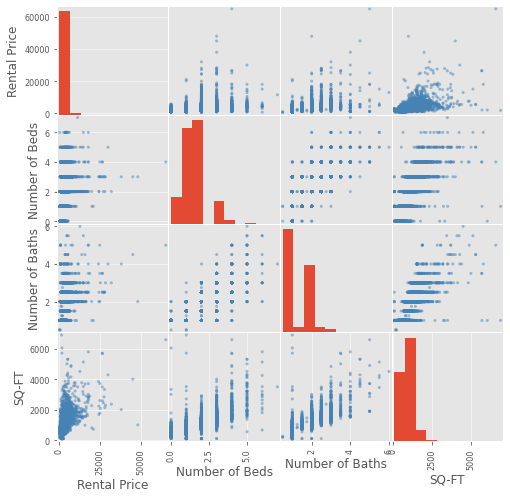

In [326]:
pd.plotting.scatter_matrix(data3, figsize = (8,8), color = 'steelblue')

In [283]:
data.n_bath.value_counts()

1.00    8626
2.00    5629
2.50     464
1.50     411
3.00     328
3.50      51
4.00      45
5.00      11
4.50       9
5.50       4
1.25       3
0.50       3
1.75       2
2.75       1
6.00       1
Name: n_bath, dtype: int64

## Modeling

In [123]:
# train test split
data1.columns

Index(['url', 'property_name', 'city', 'rent_updated', 'n_bed', 'n_bath',
       'sq_ft_updated', 'walkscore', 'allow_pet', 'minimum_lease',
       'onsite_parking', 'pool', 'fitness_center', 'elevator',
       'kitchen_features', 'security_system', 'washer_dryer', 'internet',
       'air_conditioning', 'furnished', 'Los Angeles', 'San Diego',
       'San Francisco', 'San Jose', 'Oakland'],
      dtype='object')

In [124]:
X_all = data1[[ 'n_bed', 'n_bath',
       'sq_ft_updated', 'walkscore', 'allow_pet', 'minimum_lease',
       'onsite_parking', 'pool', 'fitness_center', 'elevator',
       'kitchen_features', 'security_system', 'washer_dryer', 'internet',
       'air_conditioning', 'furnished', 'Los Angeles', 'San Diego',
       'San Francisco', 'San Jose', 'Oakland']]

y_all = data1['rent_updated']

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all)

In [275]:
def cross_val(X_train, y_train, k, regression = None):
    kf = KFold(n_splits=k, shuffle=True)
    scores = []
    
    if regression != None:
        scaler = StandardScaler()
        X_std = scaler.fit_transform(X_train)
        model = regression
        for train, test in kf.split(X_std):
            model.fit(X_std[train], y_train.iloc[train])
            y_pred = model.predict(X_std[test])
            scores.append(mean_squared_error(y_train.iloc[test], y_pred))
            
    else:
        for train, test in kf.split(X_train):
            y_pred = np.full(y_train.iloc[test].shape, np.mean(y_train.iloc[train]))
            scores.append(mean_squared_error(y_train.iloc[test], y_pred))
        
    return np.sqrt(np.mean(scores))

In [341]:
def final_testing(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_test,y_pred))

In [345]:
# Baseline
cross_val(X_train, y_train, k = 10, regression = None)

1837.926842090853

In [346]:
# Linear Regression
linear_regression = LinearRegression()
cross_val(X_train, y_train, k = 10, regression = linear_regression)

1425.552470042

In [347]:
final_testing(X_train, X_test, y_train, y_test, linear_regression)

1431.709373433622

In [291]:
X_train.columns

Index(['n_bed', 'n_bath', 'sq_ft_updated', 'walkscore', 'allow_pet',
       'minimum_lease', 'onsite_parking', 'pool', 'fitness_center', 'elevator',
       'kitchen_features', 'security_system', 'washer_dryer', 'internet',
       'air_conditioning', 'furnished', 'Los Angeles', 'San Diego',
       'San Francisco', 'San Jose', 'Oakland'],
      dtype='object')

In [294]:
X_train_updated = X_train[['n_bed', 'n_bath', 'sq_ft_updated', 'walkscore', 'allow_pet',
       'minimum_lease', 'onsite_parking', 'pool', 'fitness_center', 'elevator',
        'washer_dryer', 'internet',
       'air_conditioning', 'furnished', 'Los Angeles', 
       'San Francisco']]

In [295]:
result_p = sm.OLS(y_train, X_train_updated).fit()
result_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           rent_updated   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              4395.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):                        0.00
Time:                        10:33:23   Log-Likelihood:                     -1.0089e+05
No. Observations:               11691   AIC:                                  2.018e+05
Df Residuals:                   11675   BIC:                                  2.019e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
n_bed             -238.4589     25.158     -9.479      0.000    -287.772    -189.146
n_bath             147.2429     36.898      3.991      0.000      74.917     219.569
sq_ft_updated        2.7682      0.051     54.414      0.000       2.668       2.868
walkscore           10.3892      0.494     21.039      0.000       9.421      11.357
allow_pet          201.1690     38.553      5.218      0.000     125.598     276.740
minimum_lease      -28.0124      2.952     -9.490      0.000     -33.798     -22.227
onsite_parking    -402.2140     30.979    -12.983      0.000    -462.938    -341.490
pool               -96.0926     32.409     -2.965      0.003    -159.620     -32.565
fitness_center     166.7194     34.637      4.813      0.000      98.824     234.615
elevator           243.6021     29.111      8.368      0.000     186.539     300.665
washer_dryer       180.2401     30.883      5.836      0.000     119.704     240.777
internet            70.7727     30.908      2.290      0.022      10.187     131.358
air_conditioning  -204.2347     29.677     -6.882      0.000    -262.406    -146.064
furnished          479.6868     52.072      9.212      0.000     377.616     581.757
Los Angeles        347.1019     37.430      9.273      0.000     273.732     420.471
San Francisco      279.1094     52.972      5.269      0.000     175.276     382.943
==============================================================================
Omnibus:                    16718.441   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19530243.469
Skew:                           7.995   Prob(JB):                         0.00
Kurtosis:                     202.593   Cond. No.                     4.61e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [296]:
cross_val(X_train_updated, y_train, k = 10, regression = linear_regression)

1355.7905674457575

In [293]:
result_p = sm.OLS(y_train, X_train).fit()
result_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           rent_updated   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              3349.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):                        0.00
Time:                        10:30:50   Log-Likelihood:                     -1.0089e+05
No. Observations:               11691   AIC:                                  2.018e+05
Df Residuals:                   11670   BIC:                                  2.020e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
n_bed             -235.7430     25.235     -9.342      0.000    -285.208    -186.278
n_bath             145.9023     36.925      3.951      0.000      73.523     218.281
sq_ft_updated        2.7651      0.051     54.177      0.000       2.665       2.865
walkscore           10.3209      0.514     20.065      0.000       9.313      11.329
allow_pet          196.8379     38.825      5.070      0.000     120.734     272.942
minimum_lease      -28.1529      2.962     -9.506      0.000     -33.958     -22.348
onsite_parking    -397.3850     31.260    -12.712      0.000    -458.659    -336.111
pool              -100.2538     33.889     -2.958      0.003    -166.682     -33.826
fitness_center     158.6503     35.072      4.524      0.000      89.902     227.398
elevator           239.8262     29.910      8.018      0.000     181.197     298.456
kitchen_features    -6.0572      3.871     -1.565      0.118     -13.645       1.530
security_system     33.8849     36.295      0.934      0.351     -37.259     105.029
washer_dryer       188.1052     32.132      5.854      0.000     125.122     251.089
internet            79.5963     32.476      2.451      0.014      15.939     143.254
air_conditioning  -193.8760     31.165     -6.221      0.000    -254.965    -132.787
furnished          492.6315     52.897      9.313      0.000     388.945     596.318
Los Angeles        363.6750     39.560      9.193      0.000     286.131     441.219
San Diego           66.2025     44.471      1.489      0.137     -20.968     153.373
San Francisco      295.4805     55.346      5.339      0.000     186.992     403.969
San Jose            35.8485     54.029      0.664      0.507     -70.058     141.755
Oakland             26.5578     65.762      0.404      0.686    -102.346     155.462
==============================================================================
Omnibus:                    16707.800   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19447263.539
Skew:                           7.986   Prob(JB):                         0.00
Kurtosis:                     202.167   Cond. No.                     6.08e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [290]:
linear_regression.coef_

array([-2.19480497e+02,  1.15726250e+02,  1.20902878e+03,  3.41243202e+02,
        1.04847906e+02, -3.43257822e+01, -1.31714897e+02,  2.64902118e+00,
        8.10801911e+01,  8.27261733e+01,  7.89708192e-03,  1.26959104e+01,
        9.03655370e+01,  4.55169143e+01, -8.10582110e+01,  1.27603094e+02,
        1.12776980e+02,  1.60971844e+01,  8.46573697e+01,  1.38191289e+01,
       -1.80474886e-01])

In [349]:
# Ridge Regression
alphas = np.linspace(150, 300, 1000)
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)
regr_cv = RidgeCV(alphas=alphas)
model_cv = regr_cv.fit(X_std, y_train)
model_cv.alpha_

150.0

In [350]:
ridge_regression = Ridge(alpha = 150)
cross_val(X_train, y_train, k = 10, regression = ridge_regression)

1427.309531146673

In [351]:
final_testing(X_train, X_test, y_train, y_test, ridge_regression)

1432.1236892534432

In [201]:
# Decision Tree
dt_grid = {'max_depth': [3, None],
            'max_features': ['sqrt', 'log2', None],
            'min_samples_split': [1, 2, 4],
            'min_samples_leaf': [10, 12, 15, 17, 20],
            'random_state': [1]}

dt_gridsearch = GridSearchCV(DecisionTreeRegressor(),
                         dt_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
dt_gridsearch.fit(X_train, y_train)

print("best parameters:", dt_gridsearch.best_params_)

best_dt_model = dt_gridsearch.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.3s


best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 17, 'min_samples_split': 2, 'random_state': 1}


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    1.1s finished


In [352]:
dt_model = DecisionTreeRegressor(max_depth=None,max_features=None, min_samples_leaf=17, min_samples_split=2,random_state=1)

In [353]:
cross_val(X_train, y_train, k = 10, regression = dt_model)

1334.521890007573

In [354]:
final_testing(X_train, X_test, y_train, y_test, dt_model)

1379.8405927222498

In [219]:
# Random Forest

random_forest_grid = {'max_depth': [5, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4, 6],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [80, 100, 120],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  4.8min finished


best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 1}


In [355]:
rf_model = RandomForestRegressor(n_estimators=100,max_depth=None,min_samples_leaf=1,min_samples_split=4,random_state=1)


In [356]:
cross_val(X_train, y_train, k = 10, regression = rf_model)

1111.9854981063997

In [357]:
final_testing(X_train, X_test,y_train, y_test, rf_model)

1189.3572058694456

In [224]:
# Gradient Boosting
boost_grid = {'learning_rate': [0.01, 0.03, 0.1, 0.3],
              'max_depth': [3, None],
              'max_features': ['sqrt', 'log2', None],
              'min_samples_leaf': [ 2, 4],
              'n_estimators': [10, 20, 40, 80],
              'random_state': [1]}

gb_gridsearch = GridSearchCV(GradientBoostingRegressor(n_estimators=1000),
                             boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
gb_gridsearch.fit(X_train, y_train)

print("best parameters:", gb_gridsearch.best_params_)

best_gb_model = gb_gridsearch.best_estimator_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 726 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.4min finished


best parameters: {'learning_rate': 0.1, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 40, 'random_state': 1}


In [360]:
gb_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=None, max_features='sqrt', min_samples_leaf=4, n_estimators=40, random_state=1)

In [361]:
cross_val(X_train, y_train, k = 10, regression = gb_model)

1051.7530954017755

In [362]:
final_testing(X_train, X_test, y_train, y_test, gb_model)

1144.7783684868539

In [359]:
# Baseline final test score
y_mean_pred = np.full(y_test.shape, np.mean(y_train))
np.sqrt(mean_squared_error(y_test,y_mean_pred))

1888.6808441884941

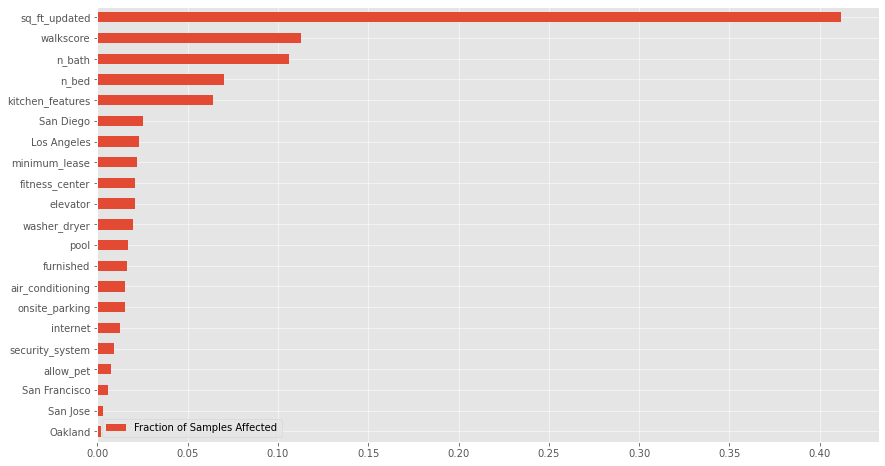

In [278]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : gb_model.feature_importances_},
                           index=X_train.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', figsize = (14,8));

<AxesSubplot:>

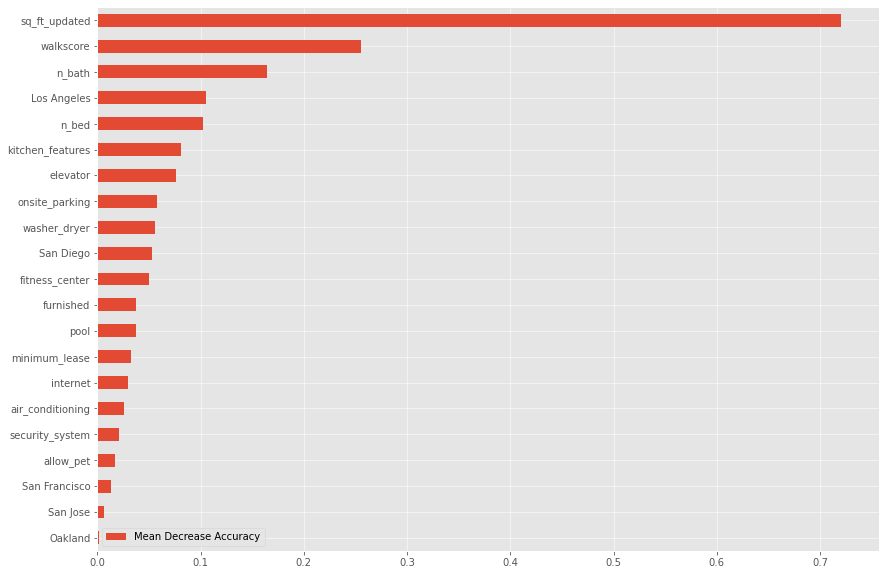

In [282]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict

scores = defaultdict(list)

names = X_train.columns
 
# crossvalidate the scores on a number of 
# different random splits of the data
splitter = ShuffleSplit(100, test_size=.3)

for train_idx, test_idx in splitter.split(X_train, y_train):
    gb_model.fit(X_train.values[train_idx], y_train.values[train_idx])
    acc = r2_score(y_train.values[test_idx], gb_model.predict(X_train.values[test_idx]))
    for i in range(X_train.shape[1]):
        X_t = X_train.values[test_idx].copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(y_train.values[test_idx], gb_model.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)

score_series = pd.DataFrame(scores).mean()
scores = pd.DataFrame({'Mean Decrease Accuracy' : score_series})
scores.sort_values(by='Mean Decrease Accuracy').plot(kind='barh', figsize = (14,10))

In [ ]:
#show that 3 bedrooms and above are crazy and could affect the performance

In [309]:
# Try dropping all the data with bed > 3
X_0to3 = data1[[ 'n_bed', 'n_bath',
       'sq_ft_updated', 'walkscore', 'allow_pet', 'minimum_lease',
       'onsite_parking', 'pool', 'fitness_center', 'elevator',
       'kitchen_features', 'security_system', 'washer_dryer', 'internet',
       'air_conditioning', 'furnished', 'Los Angeles', 'San Diego',
       'San Francisco', 'San Jose', 'Oakland']][data1.n_bed < 4]

y_0to3 = data1['rent_updated'][data1.n_bed < 4]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_0to3, y_0to3)

In [310]:
# Baseline
cross_val(X_train1, y_train1, k = 10, regression = None)

1716.0731839229293

In [312]:
# Linear Regression
linear_regression = LinearRegression()
cross_val(X_train1, y_train1, k = 10, regression = linear_regression)

1335.3860960282404

In [314]:
X_train1.columns

Index(['n_bed', 'n_bath', 'sq_ft_updated', 'walkscore', 'allow_pet',
       'minimum_lease', 'onsite_parking', 'pool', 'fitness_center', 'elevator',
       'kitchen_features', 'security_system', 'washer_dryer', 'internet',
       'air_conditioning', 'furnished', 'Los Angeles', 'San Diego',
       'San Francisco', 'San Jose', 'Oakland'],
      dtype='object')

In [332]:
X_train1_updated = X_train1[['sq_ft_updated',  'walkscore', 'allow_pet',
       'minimum_lease', 'onsite_parking', 'fitness_center', 'elevator',
        'washer_dryer', 
       'air_conditioning', 'furnished', 'Los Angeles', 
       'San Francisco', ]]

In [333]:
result_p = sm.OLS(y_train1, X_train1_updated).fit()
result_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           rent_updated   R-squared (uncentered):                   0.855
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              5636.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):                        0.00
Time:                        11:11:34   Log-Likelihood:                         -98823.
No. Observations:               11467   AIC:                                  1.977e+05
Df Residuals:                   11455   BIC:                                  1.978e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
sq_ft_updated        2.6232      0.033     78.720      0.000       2.558       2.689
walkscore           10.0957      0.497     20.327      0.000       9.122      11.069
allow_pet          154.3667     37.808      4.083      0.000      80.257     228.477
minimum_lease      -25.6148      2.921     -8.770      0.000     -31.340     -19.889
onsite_parking    -437.9832     28.681    -15.271      0.000    -494.203    -381.763
fitness_center     171.1037     31.488      5.434      0.000     109.383     232.825
elevator           255.1444     28.341      9.003      0.000     199.590     310.698
washer_dryer       220.9595     30.565      7.229      0.000     161.047     280.872
air_conditioning  -181.2001     29.136     -6.219      0.000    -238.311    -124.089
furnished          387.3381     53.962      7.178      0.000     281.564     493.112
Los Angeles        424.4025     36.875     11.509      0.000     352.122     496.683
San Francisco      405.7430     50.869      7.976      0.000     306.032     505.454
==============================================================================
Omnibus:                    17874.944   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         24450157.237
Skew:                           9.545   Prob(JB):                         0.00
Kurtosis:                     228.408   Cond. No.                     4.34e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [334]:
cross_val(X_train1_updated, y_train1, k = 10, regression = linear_regression)

1336.7549113438356

In [313]:
result_p = sm.OLS(y_train1, X_train1).fit()
result_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           rent_updated   R-squared (uncentered):                   0.856
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                              3237.
Date:                Thu, 01 Apr 2021   Prob (F-statistic):                        0.00
Time:                        10:36:19   Log-Likelihood:                         -98794.
No. Observations:               11467   AIC:                                  1.976e+05
Df Residuals:                   11446   BIC:                                  1.978e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
n_bed             -145.6462     26.447     -5.507      0.000    -197.487     -93.806
n_bath             223.5453     38.100      5.867      0.000     148.862     298.228
sq_ft_updated        2.6138      0.060     43.722      0.000       2.497       2.731
walkscore            9.5560      0.522     18.300      0.000       8.532      10.580
allow_pet          152.1359     38.981      3.903      0.000      75.727     228.545
minimum_lease      -26.1529      2.937     -8.905      0.000     -31.910     -20.396
onsite_parking    -421.8622     31.197    -13.523      0.000    -483.014    -360.711
pool              -106.1940     33.978     -3.125      0.002    -172.796     -39.592
fitness_center     195.4952     34.799      5.618      0.000     127.284     263.707
elevator           232.8344     29.672      7.847      0.000     174.673     290.996
kitchen_features     0.8791      3.854      0.228      0.820      -6.675       8.433
security_system    -15.5945     35.964     -0.434      0.665     -86.090      54.901
washer_dryer       204.1530     31.821      6.416      0.000     141.779     266.528
internet            35.8902     32.378      1.108      0.268     -27.577      99.357
air_conditioning  -183.6203     30.775     -5.967      0.000    -243.945    -123.296
furnished          361.5286     54.825      6.594      0.000     254.062     468.995
Los Angeles        409.8039     39.128     10.473      0.000     333.107     486.501
San Diego          -33.6456     44.589     -0.755      0.451    -121.048      53.756
San Francisco      356.3387     54.803      6.502      0.000     248.915     463.763
San Jose            40.3800     54.079      0.747      0.455     -65.625     146.385
Oakland             31.1796     64.796      0.481      0.630     -95.832     158.191
==============================================================================
Omnibus:                    17844.398   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         24413559.075
Skew:                           9.509   Prob(JB):                         0.00
Kurtosis:                     228.244   Cond. No.                     5.73e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [238]:
# Ridge Regression
alphas = np.linspace(150, 300, 1000)
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)
regr_cv = RidgeCV(alphas=alphas)
model_cv = regr_cv.fit(X_std, y_train)
model_cv.alpha_

273.5735735735736

In [239]:
ridge_regression = Ridge(alpha = 274)
cross_val(X_train, y_train, k = 10, regression = ridge_regression)

1319.2446150639764

In [240]:
# Decision Tree
dt_grid = {'max_depth': [3, None],
            'max_features': ['sqrt', 'log2', None],
            'min_samples_split': [1, 2, 4],
            'min_samples_leaf': [15, 20, 25, 30, 35],
            'random_state': [1]}

dt_gridsearch = GridSearchCV(DecisionTreeRegressor(),
                         dt_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
dt_gridsearch.fit(X_train, y_train)

print("best parameters:", dt_gridsearch.best_params_)

best_dt_model = dt_gridsearch.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.1s


best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 2, 'random_state': 1}


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    3.0s finished


In [246]:
cross_val(X_train, y_train, k = 10, regression = best_dt_model)

1238.7952782841057

In [247]:
# Random Forest

random_forest_grid = {'max_depth': [5, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4, 6],
                      'min_samples_leaf': [2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [80, 100, 120],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.0min finished


best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120, 'random_state': 1}


In [248]:
cross_val(X_train, y_train, k = 10, regression = best_rf_model)

1003.7746738741937

In [249]:
# Random Forest

random_forest_grid = {'max_depth': [3, 5, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [4, 6, 8],
                      'min_samples_leaf': [2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [80, 100, 120, 150],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  5.3min finished


best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150, 'random_state': 1}


In [250]:
cross_val(X_train, y_train, k = 10, regression = best_rf_model)

999.3657638133778

In [253]:
# Gradient Boosting

boost_grid = {'learning_rate': [0.03, 0.05, 0.1, 0.3],
              'max_depth': [3,5, None],
              'max_features': ['sqrt', 'log2', None],
              'min_samples_leaf': [2, 4],
              'n_estimators': [50, 100, 150],
              'random_state': [1]}

gb_gridsearch = GridSearchCV(GradientBoostingRegressor(n_estimators=500),
                             boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
gb_gridsearch.fit(X_train, y_train)

print("best parameters:", gb_gridsearch.best_params_)

best_gb_model = gb_gridsearch.best_estimator_

cross_val(X_train, y_train, k = 10, regression = best_gb_model)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.8min finished


best parameters: {'learning_rate': 0.05, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 150, 'random_state': 1}


929.3223732940174

In [254]:
# Gradient Boosting

boost_grid = {'learning_rate': [0.03, 0.05, 0.1, 0.3],
              'max_depth': [3, None],
              'max_features': ['sqrt',  None],
              'min_samples_leaf': [2, 4],
              'n_estimators': [100, 150, 170],
              'random_state': [1]}

gb_gridsearch = GridSearchCV(GradientBoostingRegressor(n_estimators=500),
                             boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
gb_gridsearch.fit(X_train, y_train)

print("best parameters:", gb_gridsearch.best_params_)

best_gb_model = gb_gridsearch.best_estimator_

cross_val(X_train, y_train, k = 10, regression = best_gb_model)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.8min finished


best parameters: {'learning_rate': 0.05, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 170, 'random_state': 1}


955.0091183066819

In [257]:
bed_group = data.groupby('n_bed')

for bed_num, bed_data in bed_group:
    print(bed_num)
    print(bed_data.rent_updated.describe())

0
count    1625.000000
mean     2209.293231
std       624.331469
min       680.000000
25%      1795.000000
50%      2123.000000
75%      2542.500000
max      5685.000000
Name: rent_updated, dtype: float64
1
count     5908.000000
mean      2661.787407
std        933.233566
min        500.000000
25%       2071.875000
50%       2535.250000
75%       3100.000000
max      21063.000000
Name: rent_updated, dtype: float64
2
count     6375.000000
mean      3398.636549
std       1691.404001
min        725.000000
25%       2455.000000
50%       3170.000000
75%       3972.000000
max      32000.000000
Name: rent_updated, dtype: float64
3
count     1382.000000
mean      4283.690666
std       3264.671819
min        750.000000
25%       2800.000000
50%       3675.000000
75%       4926.125000
max      48000.000000
Name: rent_updated, dtype: float64
4
count      221.000000
mean      5142.296380
std       5478.838843
min        904.000000
25%       3070.000000
50%       4100.000000
75%       5500.000000


In [255]:
data.columns

Index(['url', 'property_name', 'city', 'rent_updated', 'n_bed', 'n_bath',
       'sq_ft_updated', 'walkscore', 'allow_pet', 'minimum_lease',
       'onsite_parking', 'pool', 'fitness_center', 'elevator',
       'kitchen_features', 'security_system', 'washer_dryer', 'internet',
       'air_conditioning', 'furnished'],
      dtype='object')

In [337]:
# Exact

In [340]:
data_norange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7122 entries, 0 to 7121
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               7122 non-null   object 
 1   property_name     7122 non-null   object 
 2   city              7122 non-null   object 
 3   rent_updated      7122 non-null   float64
 4   n_bed             7122 non-null   int64  
 5   n_bath            7122 non-null   float64
 6   sq_ft_updated     7122 non-null   float64
 7   walkscore         7122 non-null   float64
 8   allow_pet         7122 non-null   int64  
 9   minimum_lease     7122 non-null   int64  
 10  onsite_parking    7122 non-null   int64  
 11  pool              7122 non-null   int64  
 12  fitness_center    7122 non-null   int64  
 13  elevator          7122 non-null   int64  
 14  kitchen_features  7122 non-null   int64  
 15  security_system   7122 non-null   int64  
 16  washer_dryer      7122 non-null   int64  


In [365]:
def get_city_dummies(data, n_dummies):
    city_dummies = pd.get_dummies(data['city'])
    index = data['city'].value_counts().head(n_dummies).index
    return pd.concat([data, city_dummies[index]], axis=1)

In [369]:
data_nr2 = get_city_dummies(data_norange, 3)

In [373]:
X_nr = data_nr2[['n_bed', 'n_bath',
       'sq_ft_updated', 'walkscore', 'allow_pet', 'minimum_lease',
       'onsite_parking', 'pool', 'fitness_center', 'elevator',
       'kitchen_features', 'security_system', 'washer_dryer', 'internet',
       'air_conditioning', 'furnished', 'Los Angeles', 'San Diego',
       'San Francisco']]
y_nr = data_nr2['rent_updated']

In [401]:
X_train_nr, X_test_nr, y_train_nr, y_test_nr = train_test_split(X_nr, y_nr)

In [402]:
# Baseline
cross_val(X_train_nr, y_train_nr, k = 10, regression = None)

2213.294253094405

In [403]:
# Baseline final test score
y_nr_mean_pred = np.full(y_test_nr.shape, np.mean(y_train_nr))
np.sqrt(mean_squared_error(y_test_nr,y_nr_mean_pred))

1803.919801267476

In [404]:
# Linear Regression
linear_regression = LinearRegression()
cross_val(X_train_nr, y_train_nr, k = 10, regression = linear_regression)

1728.1419715597635

In [405]:
final_testing(X_train_nr, X_test_nr, y_train_nr, y_test_nr,linear_regression)

1403.3177812954443

In [409]:
# Ridge Regression
alphas = np.linspace(150, 300, 1000)
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train_nr)
regr_cv = RidgeCV(alphas=alphas)
model_cv = regr_cv.fit(X_std, y_train_nr)
ridge_regression = Ridge(alpha = model_cv.alpha_)
cross_val(X_train_nr, y_train_nr, k = 10, regression = ridge_regression)

1722.106994803242

In [410]:
final_testing(X_train_nr, X_test_nr, y_train_nr, y_test_nr,ridge_regression)

1405.1531160387033

In [411]:
# Decision Tree
dt_grid = {'max_depth': [3, None],
            'max_features': ['sqrt', 'log2', None],
            'min_samples_split': [1, 2, 4],
            'min_samples_leaf': [15, 20, 25, 30, 35],
            'random_state': [1]}

dt_gridsearch = GridSearchCV(DecisionTreeRegressor(),
                         dt_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
dt_gridsearch.fit(X_train_nr, y_train_nr)

print("best parameters:", dt_gridsearch.best_params_)

best_dt_model = dt_gridsearch.best_estimator_
cross_val(X_train_nr, y_train_nr, k = 10, regression = best_dt_model)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.1s


best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 15, 'min_samples_split': 2, 'random_state': 1}


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    2.9s finished


1745.167393105931

In [412]:
final_testing(X_train_nr, X_test_nr, y_train_nr, y_test_nr,best_dt_model)

1358.757610494672

In [415]:
# Random Forest

random_forest_grid = {'max_depth': [3, 5, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [4, 6, 8],
                      'min_samples_leaf': [2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [80, 100, 120, 150],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
rf_gridsearch.fit(X_train_nr, y_train_nr)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_
cross_val(X_train_nr, y_train_nr, k = 10, regression = best_rf_model)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 1118 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1568 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2118 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  2.7min finished


best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150, 'random_state': 1}


1458.151552310743

In [416]:
final_testing(X_train_nr, X_test_nr, y_train_nr, y_test_nr,best_rf_model)

995.9876605051234

In [417]:
# Gradient Boosting

boost_grid = {'learning_rate': [0.03, 0.05, 0.1, 0.3],
              'max_depth': [3,5, None],
              'max_features': ['sqrt', 'log2', None],
              'min_samples_leaf': [2, 4],
              'n_estimators': [50, 100, 150],
              'random_state': [1]}

gb_gridsearch = GridSearchCV(GradientBoostingRegressor(n_estimators=500),
                             boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
gb_gridsearch.fit(X_train_nr, y_train_nr)

print("best parameters:", gb_gridsearch.best_params_)

best_gb_model = gb_gridsearch.best_estimator_

cross_val(X_train_nr, y_train_nr, k = 10, regression = best_gb_model)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 890 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.6min finished


best parameters: {'learning_rate': 0.05, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100, 'random_state': 1}


1473.6803036571844

In [418]:
final_testing(X_train_nr, X_test_nr, y_train_nr, y_test_nr,best_gb_model)

967.7747926985121